# Hypothesis Testing

### 1 Rationale 

- We know (or believe) that there *is* a ground truth.    
    Otherwise, switch to Bayesian analysis!
- The truth shall be revealed if we were able to observe infinite observations.   
    We can't observe infinite observations.
- We have to work with the finite observations $\mathcal{D}$ at hand.   
    Reformat the question from: what is the truth?   
    To: how **likely** is it for us to observe $\mathcal{D}$ if the truth is, say, $\theta=1$. 
- Estimation: Find the truth $\hat{\theta}$ that maximize the likelihood $\rightarrow$ maximum likelihood estimator 
- Hypothesis testing:   
    1. If we have a candidate $\theta_0$, we can estimate how likely it is to observe new data $\mathcal{D}'$ that is more extreme than $\mathcal{D}$ given $\theta =\theta_0$.    
    2. We can use the **measure of extremity** to quantify the "plausibility" of the hypothesis that $\theta=\theta_0$.  
    3. If we have to make a binary decison (e.g., yes or no), we choose a **threshold** for the extremity measure:   
        Extremity measure $>$ threshold $\rightarrow$ too extreme $\rightarrow$ no, the hypothesis does not hold 
        Extremity measure $\leq$ threshold $\rightarrow$ not so extreme $\rightarrow$ ... maybe we don't have enough evidence to falsify the hypothesis
    

### 2 Hypothesis Testing Fundamentals  

We will review a few key concepts in hypothesis testing without getting into (too much) details. 


#### 2.1 Ingradients of a test

**Null hypothesis ($H_0$)**: a statement saying that there is no effect/difference (hence the *null* hypothesis); the statement that you do *not* want to be true.

**Alternative hypothesis ($H_a$ or $H_1$)**: an alternative statement when the null is not true; the statement that you want evidence for. 


Q: What are the null and one alternative hypothesese for the following questions of interest:
1. Drug-effectiveness study. A pharmaceutical company wants to demonstrate that their new drug lowers mean systolic blood pressure more than the current drug already on the market.
2. A generic-medicine manufacturer must show that its generic pill is equivalent to the branded reference drug in average blood–plasma concentration (AUC). Regulatory guidelines define equivalent as the mean difference lying within $\pm 5 \%$ of the branded drug’s mean.  

**Test statistic**: a summary measure of the samples that quantify how extreme the samples is.  
- The choice of this measure depends on the hypotheses.

**Null distribution** (of the test statistic): the sampling distribution of the test statistic when the null hypothesis is true 
- The distribution depends on the test statistics in used as well as other model assumptions.

**p-value**: the probability, under the null hypothesis, of obtaining a test statistic as extreme as or more extreme than the one observed.   
- Another extremity measure. But unlike the test statistics, p-value is (literally) uniform across all tests:   
    p-value follows a uniform distribution under the null hypothesis


**Significance level**: the threshold for the p-value (commonly denoted as $\alpha$) for rejecting the null hypothesis.
- Also known as the *nominal* significance level, to acknowledge that the model assumptions might be off
- Significance level equals the probability of falsely reject a null hypothesis when the null is true (Type I error rate) and all assumptions hold.

**Critical value**: the threshold for the test statistic that corresponds to the chosen significance level

> Note: Sometimes we have to approximate the null distribution at finite sample size using the *asymptotic* distribution (i.e., the null distribution when sample size approaches infinity). It is clear that this approximation is acceptable only when the difference between the true null distribution and the asymptotic distribution is sufficiently small. Asymptotic theory guarantees sufficiently small difference between the two distributions, when the sample size is sufficiently large.  

With these key concepts introduced, we can descripe a generic testing procedure as follows.

**Sample testing procedure**

1. Write down the null and alternative hypotheses
2. Pick a nominal significance level (i.e., $\alpha$) (e.g. 0.05).  
3. Pick a test and compute the test statistic.  
4. State the test result
    - Critical-value approach: Find the critical value, and reject the null if the test statistic is larger than the critical value; otherwise **fail to reject** the null.  
    - p-value approach: calculate the p-value, and reject the null if $p < \alpha$; otherwise **fail to reject** the null.


> Note: We do **not** accept any hypothesis! Statisticians only reject or fail to reject.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

try:
    from ipywidgets import interact, FloatSlider, IntSlider
    HAVE_WIDGETS = True
except ModuleNotFoundError:
    HAVE_WIDGETS = False

rng = np.random.default_rng(0)

def hypo_demo(mu_true=0.5, n=30, alpha=0.05):
    """
    Interactive demo for two‑sided one‑sample t‑test.
    """
    mu0 = 0
    x = rng.normal(loc=mu_true, scale=1, size=n)
    xbar, s = x.mean(), x.std(ddof=1)
    t_stat = (xbar - mu0) / (s / np.sqrt(n))
    df = n - 1
    t_crit = st.t.ppf(1 - alpha/2, df)
    p_val = 2 * (1 - st.t.cdf(abs(t_stat), df))
    
    xs = np.linspace(-4, 4, 400)
    pdf = st.t.pdf(xs, df)
    
    plt.figure(figsize=(7,4))
    plt.plot(xs, pdf, label=f"null t-dist (df={df})")
    plt.fill_between(xs, 0, pdf, where=(xs <= -t_crit) | (xs >= t_crit),
                     color="lightcoral", alpha=0.4,
                     label=f"Rejection region (α={alpha:.4g})")
    plt.axvline(t_stat, color="navy", ls="--", lw=2,
                label=f"Observed t = {t_stat:.2f}")
    plt.xlabel("t value"); plt.ylabel("Density")
    plt.title("Null distribution & critical regions")
    plt.legend()
    plt.show()
    
    decision = f"Reject the null hypothesis at nominal significance level {alpha:.4g}" if abs(t_stat) > t_crit else f"Fail to reject the null at nominal significance level {alpha:.4g}"
    print(f"Sample mean = {xbar:.3f}")
    print(f"t = {t_stat:.3f},  critical ±{t_crit:.3f}")
    print(f"p-value = {p_val:.4f}  👉  {decision}")

if HAVE_WIDGETS:
    interact(
        hypo_demo,
        mu_true=FloatSlider(value=0.5, min=-1.0, max=1.0, step=0.1, description='True μ'),
        n=IntSlider(value=30, min=10, max=100, step=5, description='Sample n'),
        alpha=FloatSlider(value=0.05, min=0.01, max=0.10, step=0.01, readout_format='.02f')
    )
else:
    print("ipywidgets is not installed in this environment. "
          "Run hypo_demo(mu_true=0.5, n=30, alpha=0.05) manually or install ipywidgets for sliders.")



interactive(children=(FloatSlider(value=0.5, description='True μ', max=1.0, min=-1.0), IntSlider(value=30, des…

🐧 **Example 1 – Penguin bill length**  
**Question:** Do Adelie and Gentoo penguins have different average bill lengths?  Dataset comes from *palmerpenguins* via Seaborn.


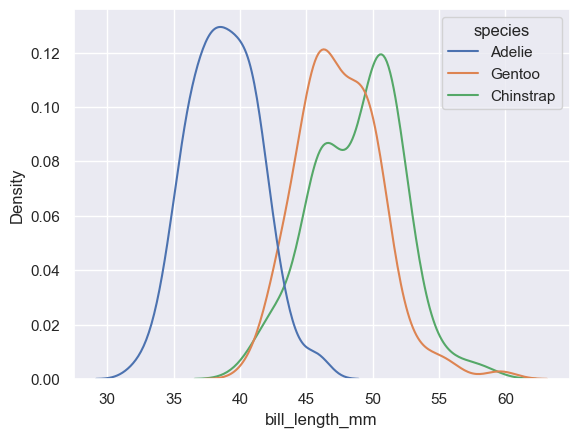

Welch t = -24.73, p = 3.087e-68


In [ ]:
from palmerpenguins import load_penguins

penguins = load_penguins().dropna(subset=['bill_length_mm','species'])
adelie = penguins[penguins['species']=='Adelie']['bill_length_mm']
gentoo = penguins[penguins['species']=='Gentoo']['bill_length_mm']

# Visual
sns.kdeplot(data=penguins, x='bill_length_mm', hue='species', common_norm=False)
plt.show()

# Two‑sample Welch t‑test
tstat, pval = stats.ttest_ind(adelie, gentoo, equal_var=False)
print(f"Welch t = {tstat:.2f}, p = {pval:.4g}")



#### 2.2 Evaluation metrics

**Type I error:** rejecting the null hypothesis when the null hypothesis is true; false positive. 

**Type II error:** failing to reject the null hypothesis when the alternative hypothesis is true; false negative.

**Type I error rate:** the probability of rejecting the null hypothesis when the null hypothesis is true. 

**Type II error rate:** the probability of failing to reject the null hypothsis when the alternative hypothesis is true.

**Power:** probability of rejecting the null hypothesis when the alternative hypothesis is true.
- Power analysis and sample size calculation: 
    Calculate the required sample size to ensure desired power of the test. 
    Require the alternative hypothesis. 
    Can use analytic results or simulation.


> Note: Almost all metrics in the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) apply here, since the test result (postive or negative) and truth (null or alternative) are both binary. 

In [ ]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
import ipywidgets as widgets
from IPython.display import display, clear_output

sns.set_theme()
rng = np.random.default_rng(42)

# ---------- simulation function ----------
def ab_sim(n_A=1000, n_B=1000, p_A=0.08, p_B=0.10, reps=10000):
    pvals = []
    for _ in range(reps):
        conv_A = rng.binomial(n_A, p_A)
        conv_B = rng.binomial(n_B, p_B)
        table  = np.array([[conv_A, n_A-conv_A],
                           [conv_B, n_B-conv_B]])
        chi2, p, *_ = stats.chi2_contingency(table, correction=False)
        pvals.append(p)
    return np.array(pvals)

# ---------- interactive widgets ----------
p_A_fixed   = 0.08                                         # baseline conversion
delta_sl    = widgets.FloatSlider(value=0.00, min=-0.10, max=0.10,
                                  step=0.01, description='Δ = p_B - p_A',
                                  continuous_update=False, readout_format='.02f')
reps_sl     = widgets.IntSlider(value=5000, min=1000, max=20000, step=1000,
                                  description='Replicates', continuous_update=False)

out_plot = widgets.Output()

def run_sim(delta, reps):
    p_B = np.clip(p_A_fixed + delta, 0, 1)                 # keep probabilities valid
    pvals = ab_sim(p_A=p_A_fixed, p_B=p_B, reps=reps)

    power = (pvals < 0.05).mean()

    with out_plot:
        clear_output(wait=True)
        plt.figure(figsize=(6,4))
        sns.histplot(pvals, bins=30, color="steelblue", edgecolor="white")
        plt.axvline(0.05, color="red", ls="--", label="α = 0.05")
        plt.title(f"p-value distribution  |  power ≈ {power:.3f}\n"
                  f"(p_A={p_A_fixed:.2f}, p_B={p_B:.2f}, n=1000 each)")
        plt.xlabel("p-value"); plt.legend()
        plt.tight_layout()
        plt.show()

widgets.interactive_output(run_sim, {'delta': delta_sl, 'reps': reps_sl})

# ---------- layout: sidebar (left) + plot (right) ----------
ui = widgets.VBox([delta_sl, reps_sl])
display(widgets.HBox([ui, out_plot]))


### 3 Common Parametric Tests

| Test | Typical Question | H₀ / H₁ (two-sided) | Test statistic | Null distribution | Key assumptions |
|------|------------------|---------------------|----------------|-------------------|-----------------|
| One-sample $t$-test | Is the population mean equal to $\mu_0$? |$H_0: \mu = \mu_0$ <br> $H_a: \mu \neq \mu_0$ | $ t = \dfrac{\bar x - \mu_0}{s/\sqrt{n}} $ | *t*-dist (df = *n* − 1) | Independent, approx. normal (or *n* > 30), unknown σ |
| Two-sample $t$-test <br>(pooled / equal-var) | Do two populations have the same mean? | $H_0: \mu_1 = \mu_2$ <br> $H_a: \mu_1 \neq \mu_2$ | $t = \dfrac{\bar x_1 - \bar x_2}{s_p\sqrt{\tfrac1{n_1}+\tfrac1{n_2}}} $<br> $s_p^2 =\tfrac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}$ | *t*-dist (df = *n₁ + n₂ − 2*) | Independent samples, normality, **equal variances** |
| One-sample $z$-test | Is the population mean equal to μ₀ *with known σ*? | $$H_0: \mu = \mu_0$ <br> $H_a: \mu \neq \mu_0$ | $ z = \dfrac{\bar x - \mu_0}{\sigma/\sqrt{n}} $ | Standard normal *N*(0, 1) | Population σ known **and** normal (or *n* large) |
| F-test for equal variances | Do three samples have the same mean? | $H_0: \mu_1 = \mu_2=\mu_3$ <br> $H_a: \mu_i \neq \mu_j$ for some $i,j$| $F={\rm MSTR}/{\rm MSE}$| *F*-dist $(df_1 = r, df_2 = n-3)$ | Independent samples, normality |

